<a href="https://colab.research.google.com/github/dr-kinder/playground/blob/dev/time_dependent_trajectories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time-Dependent Electromagnetic Fields

This notebook illustrates how to make the electric and magnetic fields in our trajectory simulation notebook vary in time and space.

In [16]:
# Get access to useful functions.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.integrate import odeint

The original notebook had four main parts:

1. Define the problem.
2. Define the function to integrate.
3. Compute the trajectory with ODEINT.
4. Plot the trajectory.

Let's look at them.  These are copied directly from Notebook #5.

# Uniform, Static Electromagnetic Fields

Uniform means constant in space — the same in all directions.

Static means constant in time — the same for all times.

This is the simplest model we can construct.

In [17]:
## PART 1: Define the problem.
# Define constant electric and magnetic fields.
Ex = 0
Ey = 0
Ez = 1
E = np.array([Ex, Ey, Ez])

Bx = 0
By = 1
Bz = 0
B = np.array([Bx, By, Bz])

# Define array of time values to study.
num_points = 501
tMax = 20
t = np.linspace(0, tMax, num_points)

# Define the initial conditions.
X0 = -5
Y0 = -5
Z0 = 0

VX0 = 2
VY0 = 1
VZ0 = 0

y0 = np.array([X0, Y0, Z0, VX0, VY0, VZ0])

In [18]:
# PART II: Define the function to integrate.
# Define the derivative function.
def dy_dt(y, t, E, B):
    """
    y = [x, y, z, vx, vy, vz]
    t = time
    E = [Ex, Ey, Ez] is the electric field
    B = [Bx, By, Bz] is the magnetic field
    
    The function returns dy/dt based on the Lorentz force law:
    F = E + vxB.
    """
    dy = np.zeros(6)
    
    # Position derivatives
    dy[0] = y[3]
    dy[1] = y[4]
    dy[2] = y[5]
    
    # Velocity derivatives
    dy[3] = E[0] + (y[4]*B[2] - y[5]*B[1])
    dy[4] = E[1] + (y[5]*B[0] - y[3]*B[2])
    dy[5] = E[2] + (y[3]*B[1] - y[4]*B[0])
    
    # Return the derivative array.
    return dy

In [19]:
## PART III: Compute the trajectory.
# Integrate the equations of motion.
trajectory = odeint(dy_dt, y0, t, args=(E,B))
x, y, z, vx, vy, vz = trajectory.transpose()

Text(0.5, 0, 'Z')

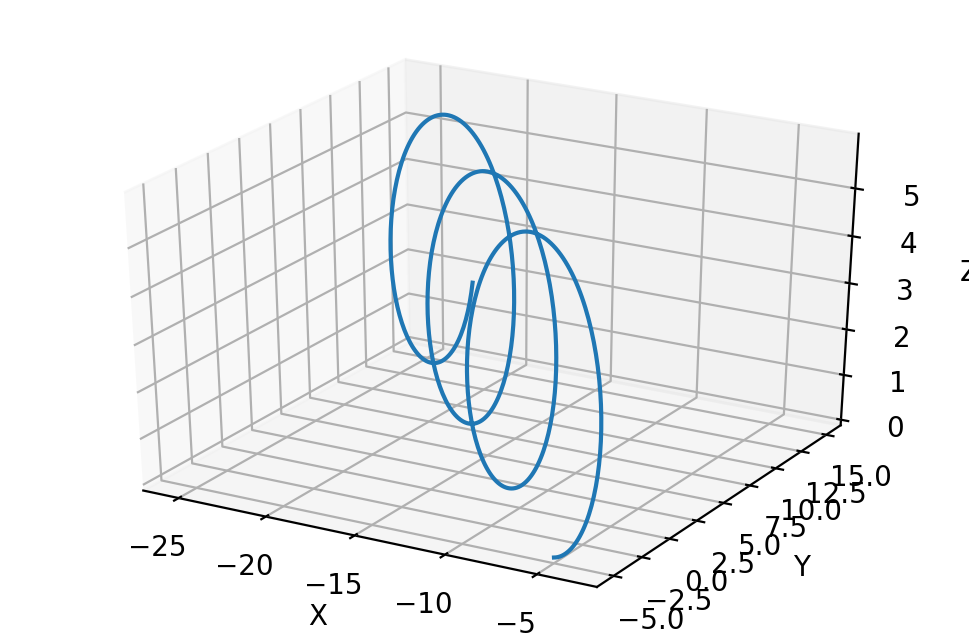

In [20]:
## PART IV: Plot the trajectory.
# Plot the result.
fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection='3d')
ax.plot(x,y,z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Other models

We can make minor modifications to Steps 2 and 3 to study a much wider range of problems.  Instead of defining ***constant values*** for the electric and magnetic fields in Step 1, we could have defined ***functions***.

The code below solves the same problem, but with functions.  The reason for doing this is that we can now **change the functions** to explore many models without any other changes in the rest of the code.

In [21]:
## PART 1: Define the problem.
# Define functions to compute electric and magnetic fields.
def getE(x,y,z,t):
    """
    Compute the electric field at location (x,y,z) at time t.
    """
    Ex = 0
    Ey = 0
    Ez = 1
    return np.array([Ex, Ey, Ez])

def getB(x,y,z,t):
    """
    Compute the magnetic field at location (x,y,z) at time t.
    """
    Bx = 0
    By = 1
    Bz = 0
    return np.array([Bx, By, Bz])

# Define array of time values to study.
num_points = 501
tMax = 20
t = np.linspace(0, tMax, num_points)

# Define the initial conditions.
X0 = -5
Y0 = -5
Z0 = 0

VX0 = 2
VY0 = 1
VZ0 = 0

y0 = np.array([X0, Y0, Z0, VX0, VY0, VZ0])

Now that *E* and *B* are functions of position and time, we need to modify the function that we send to ODEINT.

In [24]:
# PART II: Define the function to integrate.
# Define the derivative function.
def dy_dt(y, t, e_function, b_function):
    """
    y = [x, y, z, vx, vy, vz]
    t = time
    e_function = electric field function:    e_function(x,y,z,t) should return [Ex, Ey, Ez]
    b_function = magnetic field function: b_function(x,y,z,t) should return [Bx, By, Bz]

    This function returns dy/dt based on the Lorentz force law:
    F = E + vxB.
    """
    # Use functions provided to compute fields.
    E = getE(y[0], y[1], y[2], t)
    B = getB(y[0], y[1], y[2], t)

    # Empty array to store derivatives.
    dy = np.zeros(6)

    # Position derivatives
    dy[0] = y[3]
    dy[1] = y[4]
    dy[2] = y[5]

    # Velocity derivatives
    dy[3] = E[0] + (y[4]*B[2] - y[5]*B[1])
    dy[4] = E[1] + (y[5]*B[0] - y[3]*B[2])
    dy[5] = E[2] + (y[3]*B[1] - y[4]*B[0])

    # Return the derivative array.
    return dy

In [25]:
## PART III: Compute the trajectory.
# Integrate the equations of motion.
trajectory = odeint(dy_dt, y0, t, args=(getE,getB))
x, y, z, vx, vy, vz = trajectory.transpose()

Text(0.5, 0, 'Z')

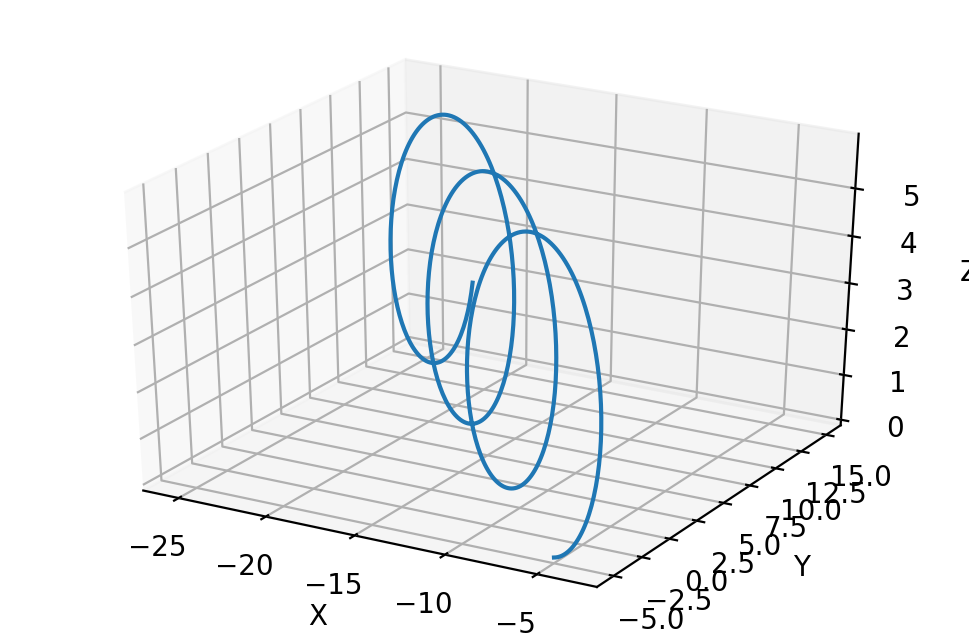

In [26]:
## PART IV: Plot the trajectory.
# Plot the result.
fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection='3d')
ax.plot(x,y,z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Other Models

Now we can modify just the elements of Step 1 — field functions, initial position and velocity, time step, etc. — and explore many different models without changing the rest of the code.

This example illustrates how to model a nonuniform magnetic field and a time-dependent electric field.

$$
\vec{E}(t) = \hat{e}_z \ \cos t
\qquad \qquad
\vec{B}(t) = \hat{e}_y \ z^2
$$

Notice how different the trajectory is.

In [30]:
## PART 1: Define the problem.  (Modify this cell.)
# Define functions to compute electric and magnetic fields.
def getE(x,y,z,t):
    """
    Compute the electric field at location (x,y,z) at time t.
    """
    Ex = 0
    Ey = 0
    Ez = np.cos(t)
    return np.array([Ex, Ey, Ez])

def getB(x,y,z,t):
    """
    Compute the magnetic field at location (x,y,z) at time t.
    """
    Bx = 0
    By = z**2
    Bz = 0
    return np.array([Bx, By, Bz])

# Define array of time values to study.
num_points = 501
tMax = 20
t = np.linspace(0, tMax, num_points)

# Define the initial conditions.
X0 = -5
Y0 = -5
Z0 = 0

VX0 = 2
VY0 = 1
VZ0 = 0

y0 = np.array([X0, Y0, Z0, VX0, VY0, VZ0])

In [31]:
# No need to change anything here.
# PART II: Define the function to integrate.
# Define the derivative function.
def dy_dt(y, t, e_function, b_function):
    """
    y = [x, y, z, vx, vy, vz]
    t = time
    e_function = electric field function:    e_function(x,y,z,t) should return [Ex, Ey, Ez]
    b_function = magnetic field function: b_function(x,y,z,t) should return [Bx, By, Bz]

    This function returns dy/dt based on the Lorentz force law:
    F = E + vxB.
    """
    # Use functions provided to compute fields.
    E = getE(y[0], y[1], y[2], t)
    B = getB(y[0], y[1], y[2], t)

    # Empty array to store derivatives.
    dy = np.zeros(6)

    # Position derivatives
    dy[0] = y[3]
    dy[1] = y[4]
    dy[2] = y[5]

    # Velocity derivatives
    dy[3] = E[0] + (y[4]*B[2] - y[5]*B[1])
    dy[4] = E[1] + (y[5]*B[0] - y[3]*B[2])
    dy[5] = E[2] + (y[3]*B[1] - y[4]*B[0])

    # Return the derivative array.
    return dy


## PART III: Compute the trajectory.
# Integrate the equations of motion.
trajectory = odeint(dy_dt, y0, t, args=(getE,getB))
x, y, z, vx, vy, vz = trajectory.transpose()

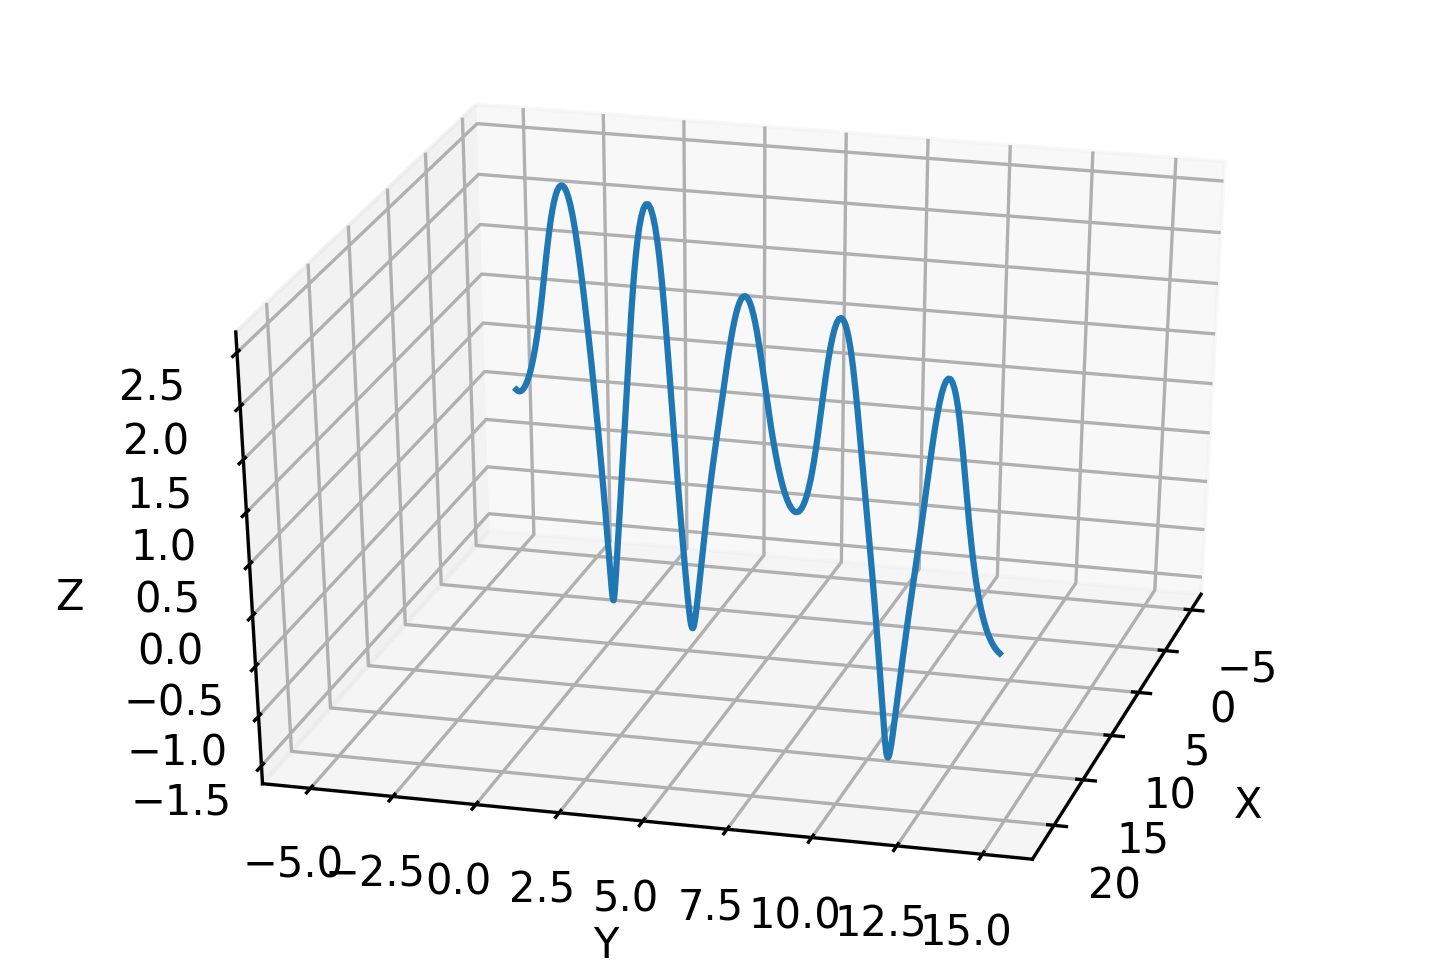

In [43]:
## PART IV: Plot the trajectory.
# Plot the result.
fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')
ax.plot(x,y,z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(30,15)